In [1]:
import pandas as pd
import random,time,csv
import numpy as np
import math,copy,os
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

import sys
sys.path.append(os.path.abspath('..'))

In [2]:
## Load dataset
from sklearn import preprocessing
df = pd.read_csv('dataset/adult.data.csv')

## Drop NULL values
df = df.dropna()

## Drop categorical features

df = df.drop(['native-country'],axis=1)

# Sex

Male  <=50K    22732
 >50K      9918
Name: Probability, dtype: int64
Female  <=50K    14423
 >50K      1769
Name: Probability, dtype: int64


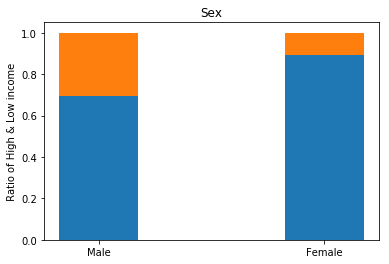

In [3]:
grouped = df.groupby('sex')


print("Male", grouped.get_group(' Male')['Probability'].value_counts())
print("Female", grouped.get_group(' Female')['Probability'].value_counts())

N = 2

val1 = (grouped.get_group(' Male')['Probability'].value_counts()[0]/len(grouped.get_group(' Male')),grouped.get_group(' Female')['Probability'].value_counts()[0]/len(grouped.get_group(' Female')))
val2 = (grouped.get_group(' Male')['Probability'].value_counts()[1]/len(grouped.get_group(' Male')),grouped.get_group(' Female')['Probability'].value_counts()[1]/len(grouped.get_group(' Female')))

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, val1, width)
p2 = plt.bar(ind, val2, width,
             bottom=val1)

plt.ylabel(' Ratio of High & Low income ')
plt.title('Sex')
plt.xticks(ind, ('Male', 'Female'))


plt.show()

# Relationship

Not-in-family  <=50K    11307
 >50K      1276
Name: Probability, dtype: int64
Husband  <=50K    10870
 >50K      8846
Name: Probability, dtype: int64
Wife  <=50K    1238
 >50K     1093
Name: Probability, dtype: int64
Own-child  <=50K    7470
 >50K      111
Name: Probability, dtype: int64
Unmarried  <=50K    4816
 >50K      309
Name: Probability, dtype: int64
Other-relative  <=50K    1454
 >50K       52
Name: Probability, dtype: int64


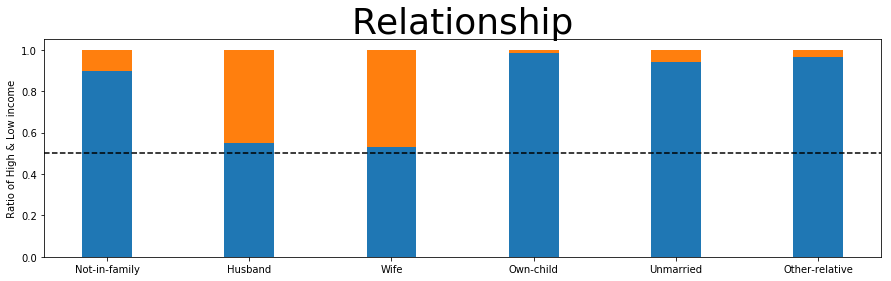

In [4]:
grouped = df.groupby('relationship')


print("Not-in-family", grouped.get_group(' Not-in-family')['Probability'].value_counts())
print("Husband", grouped.get_group(' Husband')['Probability'].value_counts())
print("Wife", grouped.get_group(' Wife')['Probability'].value_counts())
print("Own-child", grouped.get_group(' Own-child')['Probability'].value_counts())
print("Unmarried", grouped.get_group(' Unmarried')['Probability'].value_counts())
print("Other-relative", grouped.get_group(' Other-relative')['Probability'].value_counts())

N = len(df['relationship'].unique())

fig = plt.figure(num=None, figsize = (15,4), facecolor='w', edgecolor='k')


val1 = (grouped.get_group(' Not-in-family')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Not-in-family')),
        grouped.get_group(' Husband')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Husband')),
       grouped.get_group(' Wife')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Wife')),
        grouped.get_group(' Own-child')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Own-child')),
        grouped.get_group(' Unmarried')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Unmarried')),
        grouped.get_group(' Other-relative')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Other-relative')))
        
        
val2 = (grouped.get_group(' Not-in-family')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Not-in-family')),
        grouped.get_group(' Husband')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Husband')),
       grouped.get_group(' Wife')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Wife')),
        grouped.get_group(' Own-child')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Own-child')),
        grouped.get_group(' Unmarried')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Unmarried')),
        grouped.get_group(' Other-relative')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Other-relative')))

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, val1, width)
p2 = plt.bar(ind, val2, width,
             bottom=val1)

plt.axhline(y=0.5, color='black', linestyle='--')
plt.ylabel(' Ratio of High & Low income ')
plt.title('Relationship' ,fontsize = 36)
plt.xticks(ind, ('Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried','Other-relative'))


plt.show()

# Workclass

State-gov  <=50K    1451
 >50K      530
Name: Probability, dtype: int64
Self-emp-not-inc  <=50K    2785
 >50K     1077
Name: Probability, dtype: int64
Private  <=50K    26519
 >50K      7387
Name: Probability, dtype: int64
Federal-gov  <=50K    871
 >50K     561
Name: Probability, dtype: int64
Local-gov  <=50K    2209
 >50K      927
Name: Probability, dtype: int64
Self-emp-inc  >50K     938
 <=50K    757
Name: Probability, dtype: int64
Without-pay  <=50K    19
 >50K      2
Name: Probability, dtype: int64
Never-worked  <=50K    10
Name: Probability, dtype: int64
Unknown  <=50K    2534
 >50K      265
Name: Probability, dtype: int64


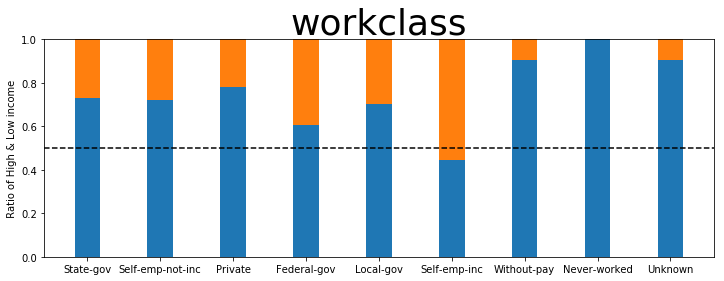

In [5]:
grouped = df.groupby('workclass')


print("State-gov", grouped.get_group(' State-gov')['Probability'].value_counts())
print("Self-emp-not-inc", grouped.get_group(' Self-emp-not-inc')['Probability'].value_counts())
print("Private", grouped.get_group(' Private')['Probability'].value_counts())
print("Federal-gov", grouped.get_group(' Federal-gov')['Probability'].value_counts())
print("Local-gov", grouped.get_group(' Local-gov')['Probability'].value_counts())
print("Self-emp-inc", grouped.get_group(' Self-emp-inc')['Probability'].value_counts())
print("Without-pay", grouped.get_group(' Without-pay')['Probability'].value_counts())
print("Never-worked", grouped.get_group(' Never-worked')['Probability'].value_counts())
print("Unknown", grouped.get_group(' ?')['Probability'].value_counts())

N = len(df['workclass'].unique()) 

fig = plt.figure(num=None, figsize = (12,4), facecolor='w', edgecolor='k')


val1 = (grouped.get_group(' State-gov')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' State-gov')),
        grouped.get_group(' Self-emp-not-inc')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Self-emp-not-inc')),
       grouped.get_group(' Private')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Private')),
        grouped.get_group(' Federal-gov')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Federal-gov')),
        grouped.get_group(' Local-gov')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Local-gov')),
        grouped.get_group(' Self-emp-inc')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Self-emp-inc')),
       grouped.get_group(' Without-pay')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Without-pay')),
       grouped.get_group(' Never-worked')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Never-worked')),
       grouped.get_group(' ?')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' ?')))
        
        
val2 = (grouped.get_group(' State-gov')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' State-gov')),
        grouped.get_group(' Self-emp-not-inc')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Self-emp-not-inc')),
       grouped.get_group(' Private')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Private')),
        grouped.get_group(' Federal-gov')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Federal-gov')),
        grouped.get_group(' Local-gov')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Local-gov')),
        grouped.get_group(' Self-emp-inc')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Self-emp-inc')),
       grouped.get_group(' Without-pay')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Without-pay')),
       0/len(grouped.get_group(' Never-worked')),
       grouped.get_group(' ?')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' ?')))

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, val1, width)
p2 = plt.bar(ind, val2, width,
             bottom=val1)

plt.axhline(y=0.5, color='black', linestyle='--')
plt.ylabel(' Ratio of High & Low income ')
plt.title('workclass' ,fontsize = 36)
plt.xticks(ind, ('State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov','Local-gov','Self-emp-inc', 'Without-pay','Never-worked','Unknown'))

plt.savefig('workclass.png')
plt.show()

# Occupation

Adm-clerical  <=50K    4843
 >50K      768
Name: Probability, dtype: int64
Exec-managerial  <=50K    3178
 >50K     2908
Name: Probability, dtype: int64
Handlers-cleaners  <=50K    1934
 >50K      138
Name: Probability, dtype: int64
Prof-specialty  <=50K    3388
 >50K     2784
Name: Probability, dtype: int64
Other-service  <=50K    4719
 >50K      204
Name: Probability, dtype: int64
Sales  <=50K    4029
 >50K     1475
Name: Probability, dtype: int64
Craft-repair  <=50K    4729
 >50K     1383
Name: Probability, dtype: int64
Transport-moving  <=50K    1874
 >50K      481
Name: Probability, dtype: int64
Farming-fishing  <=50K    1317
 >50K      173
Name: Probability, dtype: int64
Machine-op-inspct  <=50K    2650
 >50K      372
Name: Probability, dtype: int64
Tech-support  <=50K    1026
 >50K      420
Name: Probability, dtype: int64
Protective-serv  <=50K    675
 >50K     308
Name: Probability, dtype: int64
Armed-Forces  <=50K    10
 >50K      5
Name: Probability, dtype: int64
Priv-house-s

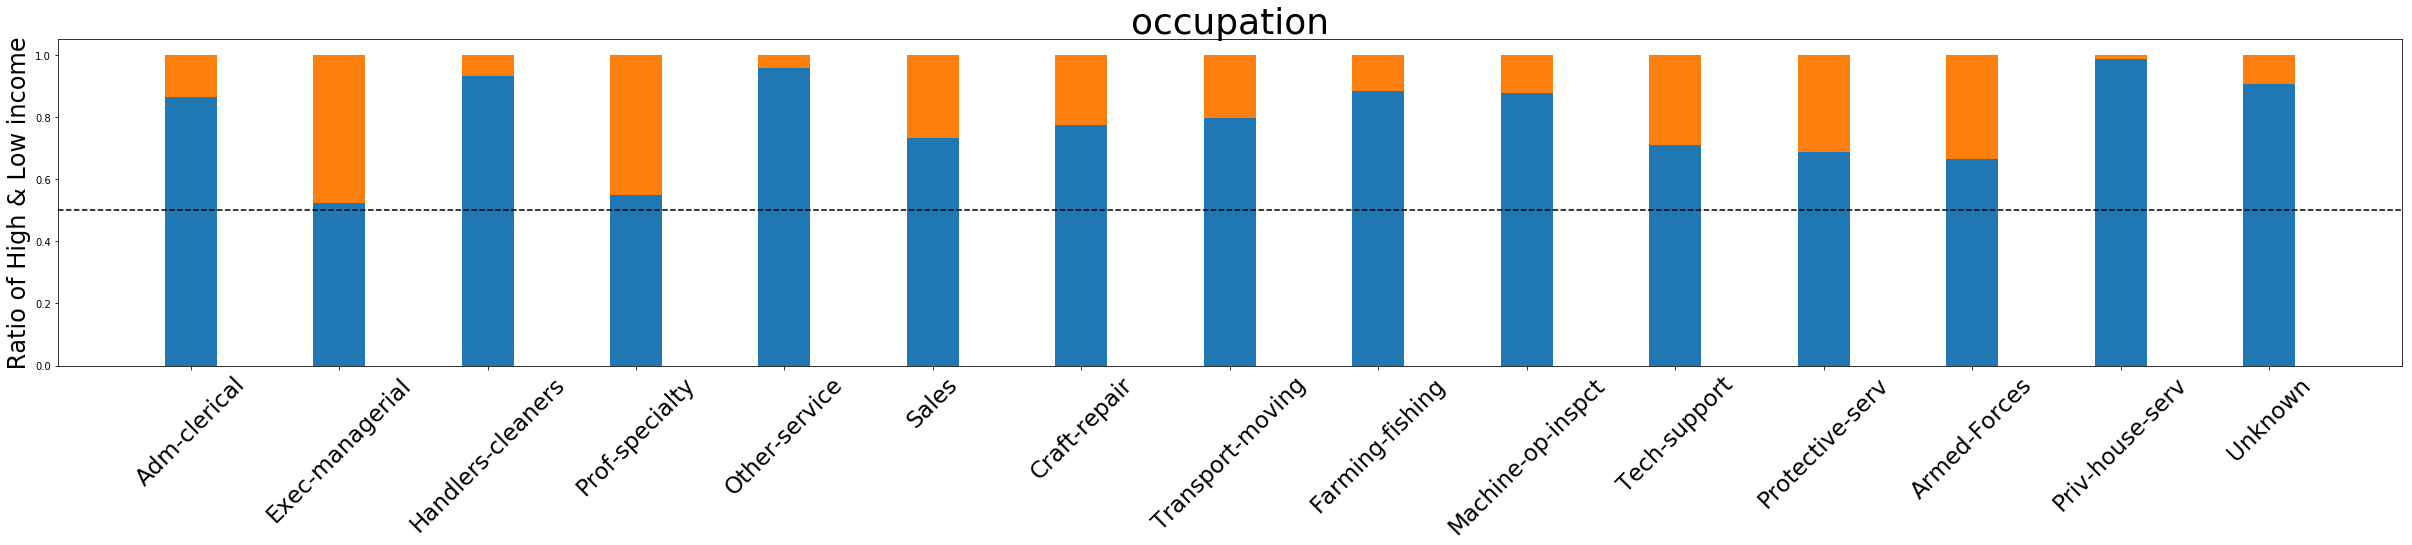

In [6]:
grouped = df.groupby('occupation')


print("Adm-clerical", grouped.get_group(' Adm-clerical')['Probability'].value_counts())
print("Exec-managerial", grouped.get_group(' Exec-managerial')['Probability'].value_counts())
print("Handlers-cleaners", grouped.get_group(' Handlers-cleaners')['Probability'].value_counts())
print("Prof-specialty", grouped.get_group(' Prof-specialty')['Probability'].value_counts())
print("Other-service", grouped.get_group(' Other-service')['Probability'].value_counts())
print("Sales", grouped.get_group(' Sales')['Probability'].value_counts())
print("Craft-repair", grouped.get_group(' Craft-repair')['Probability'].value_counts())
print("Transport-moving", grouped.get_group(' Transport-moving')['Probability'].value_counts())
print("Farming-fishing", grouped.get_group(' Farming-fishing')['Probability'].value_counts())
print("Machine-op-inspct", grouped.get_group(' Machine-op-inspct')['Probability'].value_counts())
print("Tech-support", grouped.get_group(' Tech-support')['Probability'].value_counts())
print("Protective-serv", grouped.get_group(' Protective-serv')['Probability'].value_counts())
print("Armed-Forces", grouped.get_group(' Armed-Forces')['Probability'].value_counts())
print("Priv-house-serv", grouped.get_group(' Priv-house-serv')['Probability'].value_counts())
print("Unknown", grouped.get_group(' ?')['Probability'].value_counts())

N = len(df['occupation'].unique()) 

fig = plt.figure(num=None, figsize = (42,6), facecolor='w', edgecolor='k')


val1 = (grouped.get_group(' Adm-clerical')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Adm-clerical')),
        grouped.get_group(' Exec-managerial')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Exec-managerial')),
       grouped.get_group(' Handlers-cleaners')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Handlers-cleaners')),
        grouped.get_group(' Prof-specialty')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Prof-specialty')),
        grouped.get_group(' Other-service')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Other-service')),
        grouped.get_group(' Sales')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Sales')),
       grouped.get_group(' Craft-repair')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Craft-repair')),
       grouped.get_group(' Transport-moving')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Transport-moving')),
       grouped.get_group(' Farming-fishing')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Farming-fishing')),
       grouped.get_group(' Machine-op-inspct')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Machine-op-inspct')),
       grouped.get_group(' Tech-support')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Tech-support')),
       grouped.get_group(' Protective-serv')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Protective-serv')),
       grouped.get_group(' Armed-Forces')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Armed-Forces')),
       grouped.get_group(' Priv-house-serv')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Priv-house-serv')),
       grouped.get_group(' ?')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' ?')))
        
        
val2 = (grouped.get_group(' Adm-clerical')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Adm-clerical')),
        grouped.get_group(' Exec-managerial')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Exec-managerial')),
       grouped.get_group(' Handlers-cleaners')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Handlers-cleaners')),
        grouped.get_group(' Prof-specialty')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Prof-specialty')),
        grouped.get_group(' Other-service')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Other-service')),
        grouped.get_group(' Sales')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Sales')),
       grouped.get_group(' Craft-repair')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Craft-repair')),
       grouped.get_group(' Transport-moving')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Transport-moving')),
       grouped.get_group(' Farming-fishing')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Farming-fishing')),
       grouped.get_group(' Machine-op-inspct')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Machine-op-inspct')),
       grouped.get_group(' Tech-support')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Tech-support')),
       grouped.get_group(' Protective-serv')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Protective-serv')),
       grouped.get_group(' Armed-Forces')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Armed-Forces')),
       grouped.get_group(' Priv-house-serv')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Priv-house-serv')),
       grouped.get_group(' ?')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' ?')))

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, val1, width)
p2 = plt.bar(ind, val2, width,
             bottom=val1)

plt.axhline(y=0.5, color='black', linestyle='--')
plt.ylabel(' Ratio of High & Low income ', fontsize=24)
plt.title('occupation', fontsize=36)
plt.xticks(ind, ('Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', 'Unknown'), fontsize=23 , rotation=45)

plt.savefig('occupation.png',bbox_inches = 'tight')
plt.show()

# Education

Preschool  <=50K    82
 >50K      1
Name: Probability, dtype: int64
1st-4th  <=50K    239
 >50K       8
Name: Probability, dtype: int64
5th-6th  <=50K    482
 >50K      27
Name: Probability, dtype: int64
7th-8th  <=50K    893
 >50K      62
Name: Probability, dtype: int64
9th  <=50K    715
 >50K      41
Name: Probability, dtype: int64
10th  <=50K    1302
 >50K       87
Name: Probability, dtype: int64
11th  <=50K    1720
 >50K       92
Name: Probability, dtype: int64
12th  <=50K    609
 >50K      48
Name: Probability, dtype: int64
HS-grad  <=50K    13281
 >50K      2503
Name: Probability, dtype: int64
Some-college  <=50K    8815
 >50K     2063
Name: Probability, dtype: int64
Assoc-voc  <=50K    1539
 >50K      522
Name: Probability, dtype: int64
Assoc-acdm  <=50K    1188
 >50K      413
Name: Probability, dtype: int64
Bachelors  <=50K    4712
 >50K     3313
Name: Probability, dtype: int64
Masters  >50K     1459
 <=50K    1198
Name: Probability, dtype: int64
Prof-school  >50K     617
 <=50

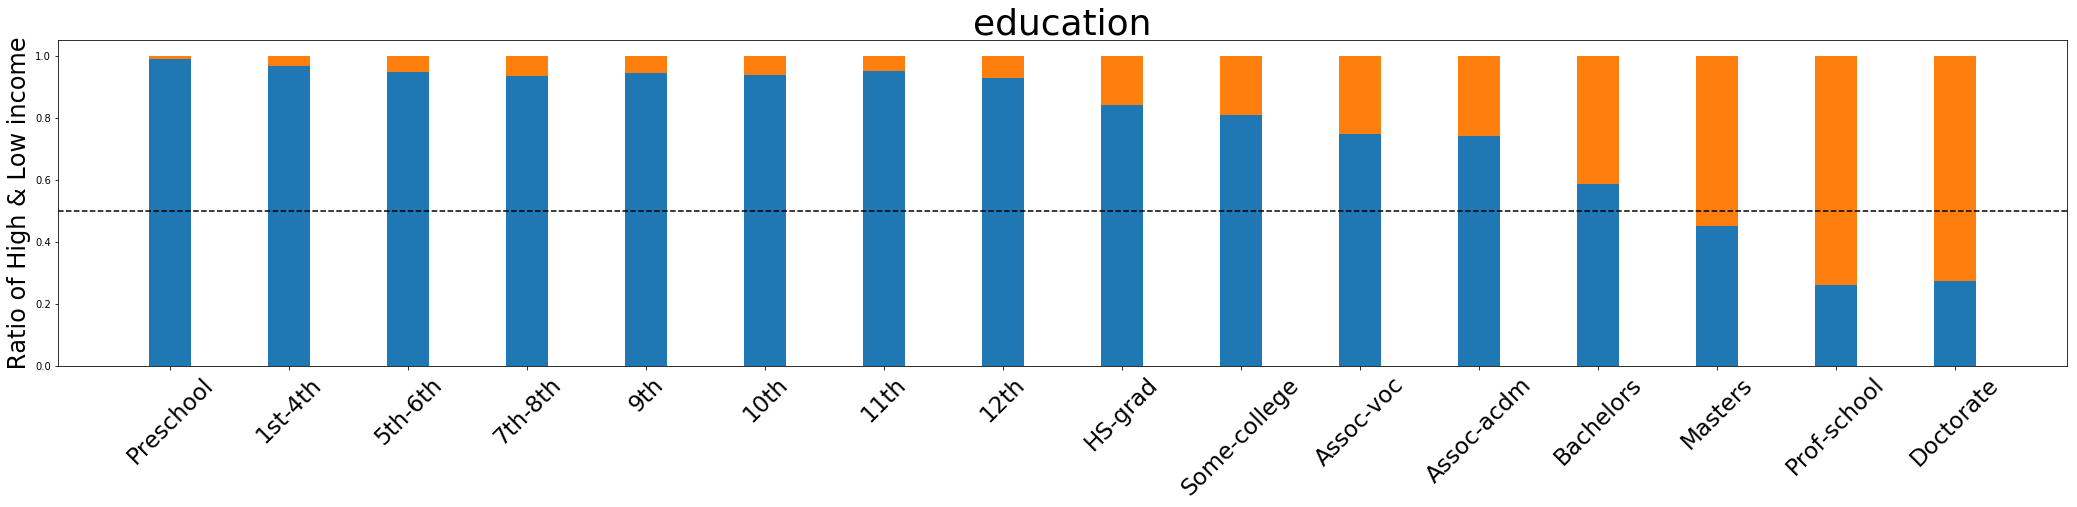

In [7]:
grouped = df.groupby('education')

print("Preschool", grouped.get_group(' Preschool')['Probability'].value_counts())
print("1st-4th", grouped.get_group(' 1st-4th')['Probability'].value_counts())
print("5th-6th", grouped.get_group(' 5th-6th')['Probability'].value_counts())
print("7th-8th", grouped.get_group(' 7th-8th')['Probability'].value_counts())
print("9th", grouped.get_group(' 9th')['Probability'].value_counts())
print("10th", grouped.get_group(' 10th')['Probability'].value_counts())
print("11th", grouped.get_group(' 11th')['Probability'].value_counts())
print("12th", grouped.get_group(' 12th')['Probability'].value_counts())
print("HS-grad", grouped.get_group(' HS-grad')['Probability'].value_counts())
print("Some-college", grouped.get_group(' Some-college')['Probability'].value_counts())
print("Assoc-voc", grouped.get_group(' Assoc-voc')['Probability'].value_counts())
print("Assoc-acdm", grouped.get_group(' Assoc-acdm')['Probability'].value_counts())
print("Bachelors", grouped.get_group(' Bachelors')['Probability'].value_counts())
print("Masters", grouped.get_group(' Masters')['Probability'].value_counts())
print("Prof-school", grouped.get_group(' Prof-school')['Probability'].value_counts())
print("Doctorate", grouped.get_group(' Doctorate')['Probability'].value_counts())


N = len(df['education'].unique()) 

fig = plt.figure(num=None, figsize = (36,6), facecolor='w', edgecolor='k')




val1 = (grouped.get_group(' Preschool')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Preschool')),
        grouped.get_group(' 1st-4th')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' 1st-4th')),
       grouped.get_group(' 5th-6th')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' 5th-6th')),
        grouped.get_group(' 7th-8th')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' 7th-8th')),
        grouped.get_group(' 9th')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' 9th')),
        grouped.get_group(' 10th')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' 10th')),
       grouped.get_group(' 11th')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' 11th')),
       grouped.get_group(' 12th')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' 12th')),
        grouped.get_group(' HS-grad')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' HS-grad')),
        grouped.get_group(' Some-college')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Some-college')),
        grouped.get_group(' Assoc-voc')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Assoc-voc')),
        grouped.get_group(' Assoc-acdm')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Assoc-acdm')),
       grouped.get_group(' Bachelors')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Bachelors')),       
       grouped.get_group(' Masters')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Masters')),
       grouped.get_group(' Prof-school')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Prof-school')),       
       grouped.get_group(' Doctorate')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Doctorate')))
       

val2 = (grouped.get_group(' Preschool')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Preschool')),
    grouped.get_group(' 1st-4th')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' 1st-4th')),
   grouped.get_group(' 5th-6th')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' 5th-6th')),
    grouped.get_group(' 7th-8th')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' 7th-8th')),
    grouped.get_group(' 9th')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' 9th')),
    grouped.get_group(' 10th')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' 10th')),
   grouped.get_group(' 11th')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' 11th')),
   grouped.get_group(' 12th')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' 12th')),
    grouped.get_group(' HS-grad')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' HS-grad')),
    grouped.get_group(' Some-college')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Some-college')),
    grouped.get_group(' Assoc-voc')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Assoc-voc')),
    grouped.get_group(' Assoc-acdm')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Assoc-acdm')),
   grouped.get_group(' Bachelors')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Bachelors')),       
   grouped.get_group(' Masters')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Masters')),
   grouped.get_group(' Prof-school')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Prof-school')),       
   grouped.get_group(' Doctorate')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Doctorate')))

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, val1, width)
p2 = plt.bar(ind, val2, width,
             bottom=val1)

plt.axhline(y=0.5, color='black', linestyle='--')
plt.ylabel(' Ratio of High & Low income ', fontsize=24)
plt.title('education', fontsize=36)
plt.xticks(ind, ('Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm',
'Bachelors','Masters','Prof-school', 'Doctorate'), fontsize=23 , rotation=45)



plt.savefig('education.png', bbox_inches = 'tight')
plt.show()

# capital-loss

[1 3 2]
<1000  <=50K    36060
 >50K     10545
Name: Probability, dtype: int64
1000-2000  >50K     936
 <=50K    810
Name: Probability, dtype: int64
>2000  <=50K    285
 >50K     206
Name: Probability, dtype: int64


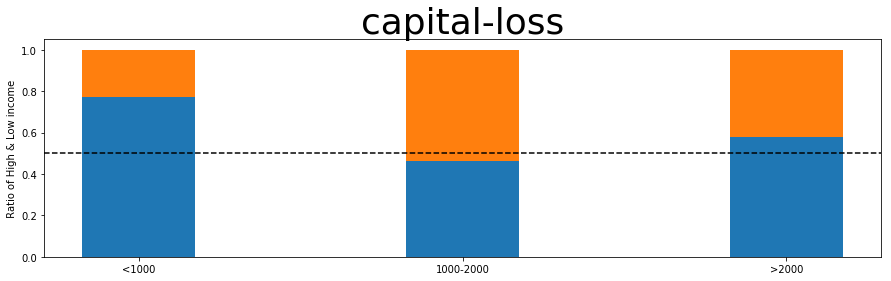

In [8]:
df['capital-loss'] = np.where((df['capital-loss'] < 1000 ), 1, df['capital-loss'])
df['capital-loss'] = np.where((df['capital-loss'] >= 1000 ) & (df['capital-loss'] < 2000), 2, df['capital-loss'])
df['capital-loss'] = np.where((df['capital-loss'] >= 2000 ), 3, df['capital-loss'])

print(df['capital-loss'].unique())

grouped = df.groupby('capital-loss')


print("<1000", grouped.get_group(1)['Probability'].value_counts())
print("1000-2000", grouped.get_group(2)['Probability'].value_counts())
print(">2000", grouped.get_group(3)['Probability'].value_counts())

N = len(df['capital-loss'].unique())

fig = plt.figure(num=None, figsize = (15,4), facecolor='w', edgecolor='k')


val1 = (grouped.get_group(1)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(1)),
        grouped.get_group(2)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(2)),
       grouped.get_group(3)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(3)))
        
        
val2 = (grouped.get_group(1)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(1)),
        grouped.get_group(2)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(2)),
       grouped.get_group(3)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(3)))

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, val1, width)
p2 = plt.bar(ind, val2, width,
             bottom=val1)

plt.axhline(y=0.5, color='black', linestyle='--')
plt.ylabel(' Ratio of High & Low income ')
plt.title('capital-loss' ,fontsize = 36)
plt.xticks(ind, ('<1000', '1000-2000', '>2000'))

plt.savefig('capital-loss.png')
plt.show()

# capital-gain

[0 2 1 3]
<5000  <=50K    36912
 >50K      9479
Name: Probability, dtype: int64
5000-10,000  >50K     1092
 <=50K     225
Name: Probability, dtype: int64
10,000-20,000  >50K     745
 <=50K      8
Name: Probability, dtype: int64
>20,000  >50K     371
 <=50K     10
Name: Probability, dtype: int64


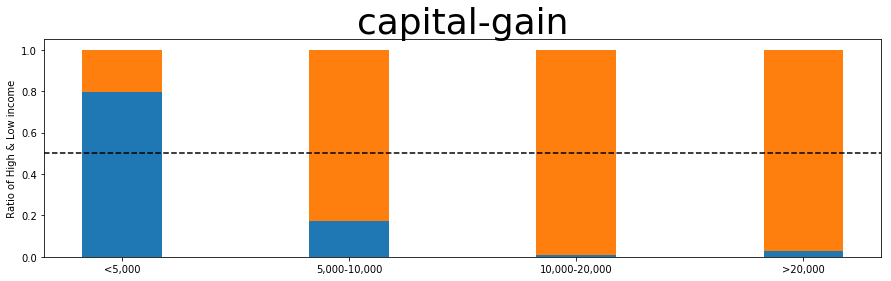

In [9]:
df['capital-gain'] = np.where((df['capital-gain'] < 5000 ), 0, df['capital-gain'])
df['capital-gain'] = np.where((df['capital-gain'] >= 5000 ) & (df['capital-gain'] < 10000), 1, df['capital-gain'])
df['capital-gain'] = np.where((df['capital-gain'] >= 10000 ) & (df['capital-gain'] < 20000), 2, df['capital-gain'])
df['capital-gain'] = np.where((df['capital-gain'] >= 20000 ), 3, df['capital-gain'])

print(df['capital-gain'].unique())

grouped = df.groupby('capital-gain')

print("<5000", grouped.get_group(0)['Probability'].value_counts())
print("5000-10,000", grouped.get_group(1)['Probability'].value_counts())
print("10,000-20,000", grouped.get_group(2)['Probability'].value_counts())
print(">20,000", grouped.get_group(3)['Probability'].value_counts())

N = len(df['capital-gain'].unique())

fig = plt.figure(num=None, figsize = (15,4), facecolor='w', edgecolor='k')


val1 = (grouped.get_group(0)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(0)),
        grouped.get_group(1)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(1)),
        grouped.get_group(2)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(2)),
       grouped.get_group(3)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(3)))
        
        
val2 = (grouped.get_group(0)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(0)),
        grouped.get_group(1)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(1)),
        grouped.get_group(2)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(2)),
       grouped.get_group(3)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(3)))

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, val1, width)
p2 = plt.bar(ind, val2, width,
             bottom=val1)

plt.axhline(y=0.5, color='black', linestyle='--')
plt.ylabel(' Ratio of High & Low income ')
plt.title('capital-gain' ,fontsize = 36)
plt.xticks(ind, ('<5,000', '5,000-10,000', '10,000-20,000', '>20,000'))

plt.savefig('capital-gain.png')
plt.show()

# hours-per-week

[5 2 6 7 4 3 1]
<10  <=50K    628
 >50K      72
Name: Probability, dtype: int64
10-20  <=50K    1774
 >50K      117
Name: Probability, dtype: int64
20-30  <=50K    3339
 >50K      221
Name: Probability, dtype: int64
30-40  <=50K    4851
 >50K      685
Name: Probability, dtype: int64
40-50  <=50K    21006
 >50K      6468
Name: Probability, dtype: int64
50-60  <=50K    3257
 >50K     2571
Name: Probability, dtype: int64
>60  <=50K    2300
 >50K     1553
Name: Probability, dtype: int64


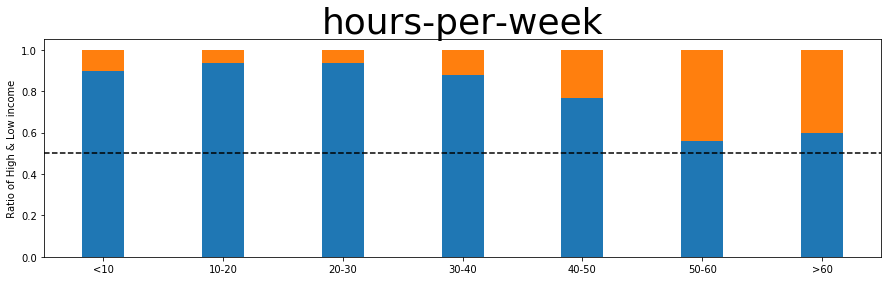

In [10]:
df['hours-per-week'] = np.where((df['hours-per-week'] < 10 ), 1, df['hours-per-week'])
df['hours-per-week'] = np.where((df['hours-per-week'] >= 10 ) & (df['hours-per-week'] < 20), 2, df['hours-per-week'])
df['hours-per-week'] = np.where((df['hours-per-week'] >= 20 ) & (df['hours-per-week'] < 30), 3, df['hours-per-week'])
df['hours-per-week'] = np.where((df['hours-per-week'] >= 30 ) & (df['hours-per-week'] < 40), 4, df['hours-per-week'])
df['hours-per-week'] = np.where((df['hours-per-week'] >= 40 ) & (df['hours-per-week'] < 50), 5, df['hours-per-week'])
df['hours-per-week'] = np.where((df['hours-per-week'] >= 50 ) & (df['hours-per-week'] < 60), 6, df['hours-per-week'])
df['hours-per-week'] = np.where((df['hours-per-week'] >= 60 ), 7, df['hours-per-week'])

print(df['hours-per-week'].unique())

grouped = df.groupby('hours-per-week')

print("<10", grouped.get_group(1)['Probability'].value_counts())
print("10-20", grouped.get_group(2)['Probability'].value_counts())
print("20-30", grouped.get_group(3)['Probability'].value_counts())
print("30-40", grouped.get_group(4)['Probability'].value_counts())
print("40-50", grouped.get_group(5)['Probability'].value_counts())
print("50-60", grouped.get_group(6)['Probability'].value_counts())
print(">60", grouped.get_group(7)['Probability'].value_counts())


N = len(df['hours-per-week'].unique())

fig = plt.figure(num=None, figsize = (15,4), facecolor='w', edgecolor='k')


val1 = (grouped.get_group(1)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(1)),
        grouped.get_group(2)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(2)),
       grouped.get_group(3)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(3)),
        grouped.get_group(4)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(4)),
        grouped.get_group(5)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(5)),
        grouped.get_group(6)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(6)),
       grouped.get_group(7)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(7)))
        
        
val2 = (grouped.get_group(1)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(1)),
        grouped.get_group(2)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(2)),
       grouped.get_group(3)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(3)),
        grouped.get_group(4)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(4)),
        grouped.get_group(5)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(5)),
        grouped.get_group(6)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(6)),
       grouped.get_group(7)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(7)))

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, val1, width)
p2 = plt.bar(ind, val2, width,
             bottom=val1)

plt.axhline(y=0.5, color='black', linestyle='--')
plt.ylabel(' Ratio of High & Low income ')
plt.title('hours-per-week' ,fontsize = 36)
plt.xticks(ind, ('<10', '10-20', '20-30', '30-40', '40-50' , '50-60' , '>60'))

plt.savefig('hours-per-week.png')
plt.show()

# marital-status

Never-married  <=50K    15384
 >50K       733
Name: Probability, dtype: int64
Married-civ-spouse  <=50K    12395
 >50K      9984
Name: Probability, dtype: int64
Divorced  <=50K    5962
 >50K      671
Name: Probability, dtype: int64
Married-spouse-absent  <=50K    570
 >50K      58
Name: Probability, dtype: int64
Separated  <=50K    1431
 >50K       99
Name: Probability, dtype: int64
Married-AF-spouse  <=50K    23
 >50K     14
Name: Probability, dtype: int64
Widowed  <=50K    1390
 >50K      128
Name: Probability, dtype: int64


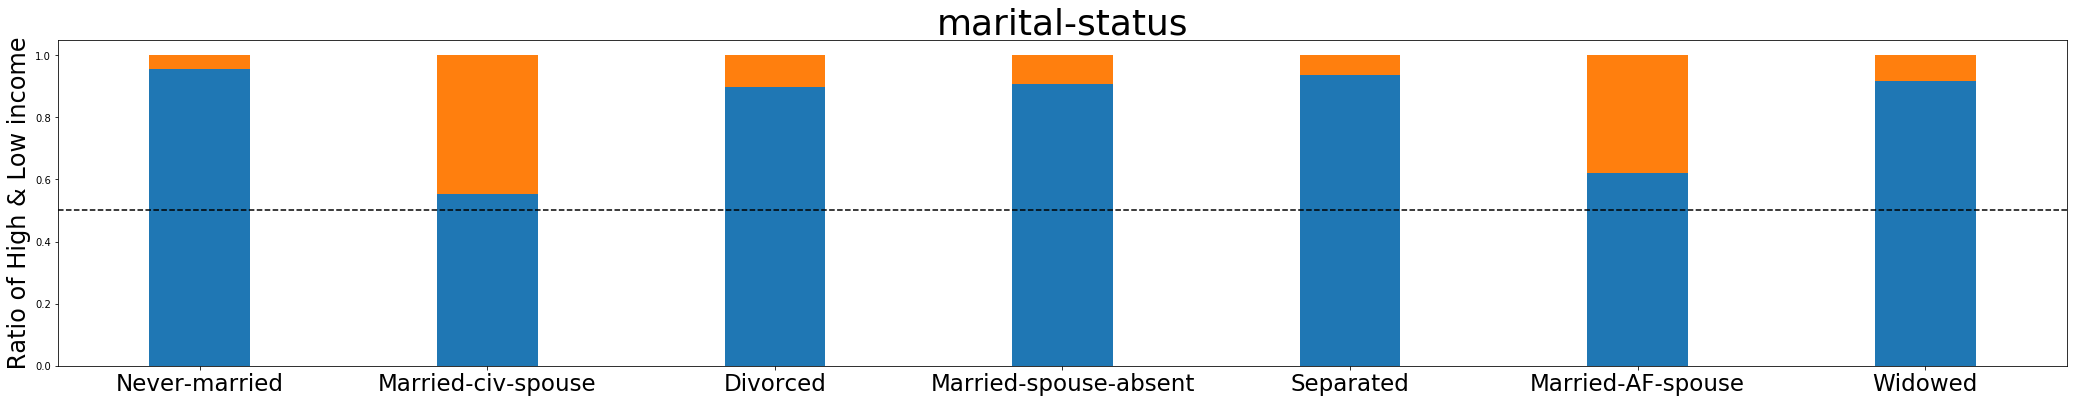

In [11]:
grouped = df.groupby('marital-status')

print("Never-married", grouped.get_group(' Never-married')['Probability'].value_counts())
print("Married-civ-spouse", grouped.get_group(' Married-civ-spouse')['Probability'].value_counts())
print("Divorced", grouped.get_group(' Divorced')['Probability'].value_counts())
print("Married-spouse-absent", grouped.get_group(' Married-spouse-absent')['Probability'].value_counts())
print("Separated", grouped.get_group(' Separated')['Probability'].value_counts())
print("Married-AF-spouse", grouped.get_group(' Married-AF-spouse')['Probability'].value_counts())
print("Widowed", grouped.get_group(' Widowed')['Probability'].value_counts())

N = len(df['marital-status'].unique()) 

fig = plt.figure(num=None, figsize = (36,6), facecolor='w', edgecolor='k')




val1 = (grouped.get_group(' Never-married')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Never-married')),
        grouped.get_group(' Married-civ-spouse')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Married-civ-spouse')),
       grouped.get_group(' Divorced')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Divorced')),
        grouped.get_group(' Married-spouse-absent')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Married-spouse-absent')),
        grouped.get_group(' Separated')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Separated')),
        grouped.get_group(' Married-AF-spouse')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Married-AF-spouse')),
       grouped.get_group(' Widowed')['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(' Widowed')))
        
val2 = (grouped.get_group(' Never-married')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Never-married')),
        grouped.get_group(' Married-civ-spouse')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Married-civ-spouse')),
       grouped.get_group(' Divorced')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Divorced')),
        grouped.get_group(' Married-spouse-absent')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Married-spouse-absent')),
        grouped.get_group(' Separated')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Separated')),
        grouped.get_group(' Married-AF-spouse')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Married-AF-spouse')),
       grouped.get_group(' Widowed')['Probability'].value_counts().get(' >50K')/len(grouped.get_group(' Widowed')))
        

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, val1, width)
p2 = plt.bar(ind, val2, width,
             bottom=val1)

plt.axhline(y=0.5, color='black', linestyle='--')
plt.ylabel(' Ratio of High & Low income ', fontsize=24)
plt.title('marital-status', fontsize=36)
plt.xticks(ind, ('Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'), fontsize=23)



plt.savefig('marital-status.png')
plt.show()

# age 

[4 6 3 5 2 7]
10-20  <=50K    2507
 >50K        3
Name: Probability, dtype: int64
20-30  <=50K    11262
 >50K       743
Name: Probability, dtype: int64
30-40  <=50K    9468
 >50K     3461
Name: Probability, dtype: int64
40-50  <=50K    6738
 >50K     3986
Name: Probability, dtype: int64
50-60  <=50K    4110
 >50K     2509
Name: Probability, dtype: int64
>60  <=50K    3070
 >50K      985
Name: Probability, dtype: int64


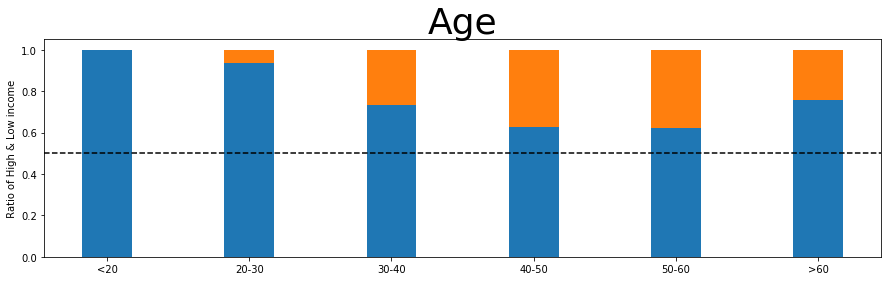

In [12]:
df['age'] = np.where((df['age'] < 20 ), 2, df['age'])
df['age'] = np.where((df['age'] >= 20 ) & (df['age'] < 30), 3, df['age'])
df['age'] = np.where((df['age'] >= 30 ) & (df['age'] < 40), 4, df['age'])
df['age'] = np.where((df['age'] >= 40 ) & (df['age'] < 50), 5, df['age'])
df['age'] = np.where((df['age'] >= 50 ) & (df['age'] < 60), 6, df['age'])
df['age'] = np.where((df['age'] >= 60 ), 7, df['age'])

print(df['age'].unique())

grouped = df.groupby('age')


print("10-20", grouped.get_group(2)['Probability'].value_counts())
print("20-30", grouped.get_group(3)['Probability'].value_counts())
print("30-40", grouped.get_group(4)['Probability'].value_counts())
print("40-50", grouped.get_group(5)['Probability'].value_counts())
print("50-60", grouped.get_group(6)['Probability'].value_counts())
print(">60", grouped.get_group(7)['Probability'].value_counts())


N = len(df['age'].unique())

fig = plt.figure(num=None, figsize = (15,4), facecolor='w', edgecolor='k')


val1 = (grouped.get_group(2)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(2)),
       grouped.get_group(3)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(3)),
        grouped.get_group(4)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(4)),
        grouped.get_group(5)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(5)),
        grouped.get_group(6)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(6)),
       grouped.get_group(7)['Probability'].value_counts().get(' <=50K')/len(grouped.get_group(7)))
        
        
val2 = (grouped.get_group(2)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(2)),
       grouped.get_group(3)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(3)),
        grouped.get_group(4)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(4)),
        grouped.get_group(5)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(5)),
        grouped.get_group(6)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(6)),
       grouped.get_group(7)['Probability'].value_counts().get(' >50K')/len(grouped.get_group(7)))

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, val1, width)
p2 = plt.bar(ind, val2, width,
             bottom=val1)

plt.axhline(y=0.5, color='black', linestyle='--')
plt.ylabel(' Ratio of High & Low income ')
plt.title('Age',fontsize = 36)
plt.xticks(ind, ('<20', '20-30', '30-40', '40-50' , '50-60' , '>60'))

plt.savefig('age.png')
plt.show()